In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from gaussian import Gaussian


a=Gaussian()
k=10
img = cv2.imread('calibration Data/image0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image=[]
dog=[]

sigma=1
for i in range(1,k+1):
    image.append(a.apply_gaussian_filter(gray, i*sigma, ))

for i in range(len(image)-1):
    dog.append(image[i]-image[i+1])


           
        


In [28]:
def non_maximum_suppression(dog):
    suppressed = []
    for i in range(1, len(dog) - 1):
        max_img = np.maximum(np.maximum(dog[i-1], dog[i]), dog[i+1])
        suppressed.append(np.where(dog[i] == max_img, dog[i], 0))
    return suppressed




suppressed_dog = non_maximum_suppression(dog)


In [29]:
# for i in range(len(suppressed_dog)):
#     plt.imshow(suppressed_dog[i], cmap='gray')
#     plt.show()

In [30]:
print(len(dog),len(image),k)

9 10 10


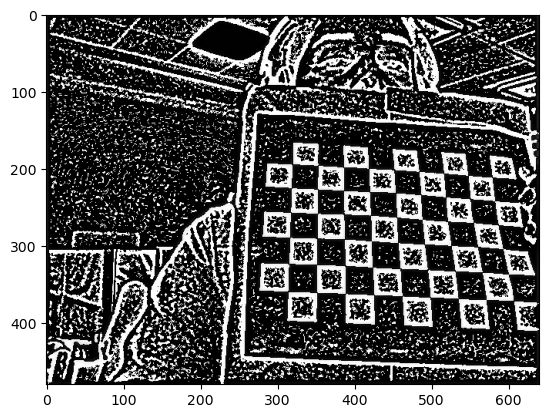

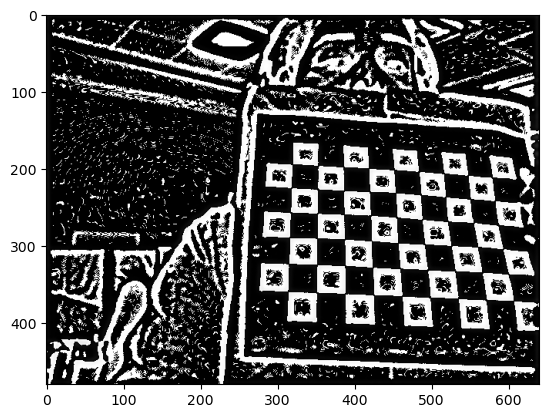

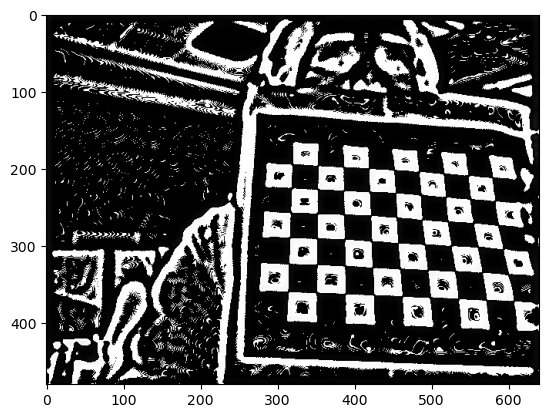

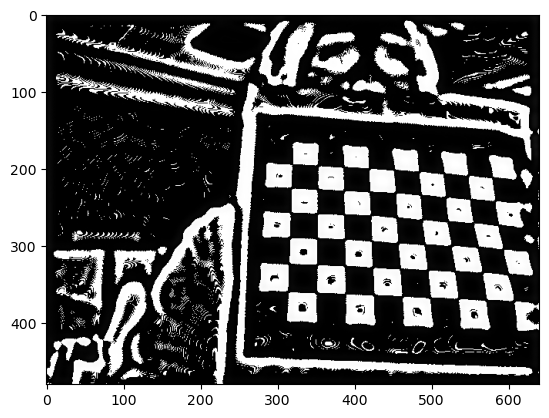

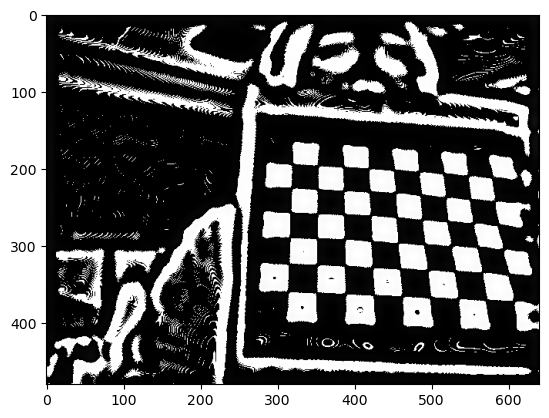

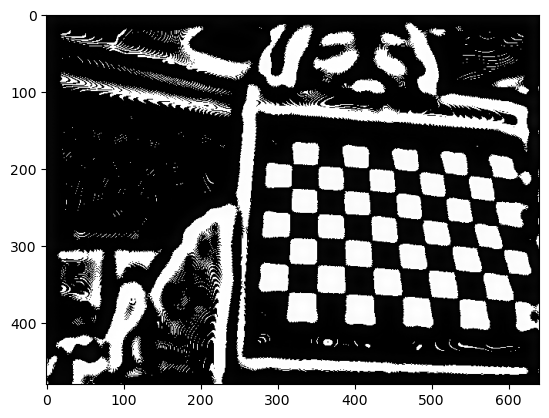

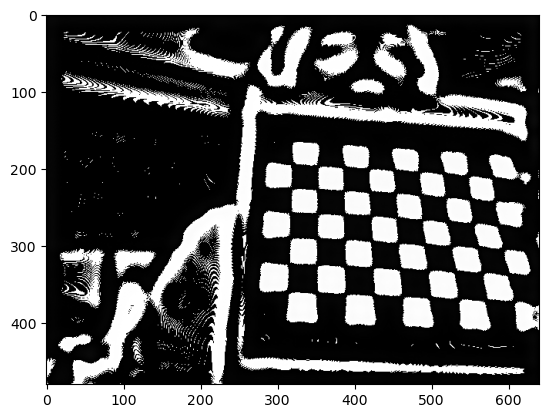

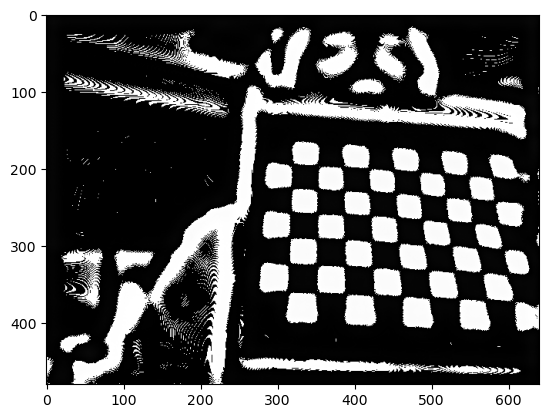

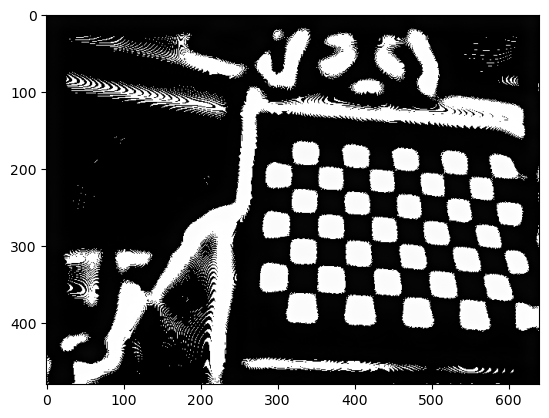

In [31]:
for i in range(len(dog)):
    plt.imshow(dog[i], cmap='gray')
    plt.show()